## Model aim: To predict whether the cancer is benign or malignant

The data is stored in a .csv file consisting of 32 columns

A Tumor is a swelling of a part of the body, generally without inflammation, caused by an abnormal growth of tissue, whether benign or malignant.

Benign tumors are harmless and can be left alone
Malignant tumors can be life-threatening

### Attributes information:
1. ID number
2. diagnosis (The diagnosis of breast tissues-M=Malignant,B=Benign)
(3-32)
Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

Standard error data is also provided in columns named in the format ["feature" se] 

The attributes with the name in the format of ["feature worst"] contains the data worst or largest mean value of the feature


sources:Dataset: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
             

## importing libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
print("Imported")

Imported


## reading data

In [140]:
raw_data=pd.read_csv("breast cancer data.csv")

## analysing data

In [141]:
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [142]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

## processing data

In [205]:
raw_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [276]:
dropping_column=['id','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
        'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se','texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32','texture_mean']
dropped_df=raw_data.drop(dropping_column,axis=1)
dropped_df.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_worst
0,M,17.99,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,25.38
1,M,20.57,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,24.99
2,M,19.69,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,23.57
3,M,11.42,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,14.91
4,M,20.29,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,22.54


## dealing with dummy variables

In [277]:
prep_data=dropped_df.replace({"M":1,"B":0})
prep_data.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_worst
0,1,17.99,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,25.38
1,1,20.57,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,24.99
2,1,19.69,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,23.57
3,1,11.42,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,14.91
4,1,20.29,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,22.54


In [278]:
prep_data.corr()

,diagnosis,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_worst
diagnosis,1.000000,0.730029,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.776454
radius_mean,0.730029,1.000000,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.969539
perimeter_mean,0.742636,0.997855,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.969476
area_mean,0.708984,0.987357,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.962746
smoothness_mean,0.358560,0.170581,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.213120
compactness_mean,0.596534,0.506124,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.535315
concavity_mean,0.696360,0.676764,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.688236
concave points_mean,0.776614,0.822529,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.830318
symmetry_mean,0.330499,0.147741,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.185728
fractal_dimension_mean,-0.012838,-0.311631,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,-0.253691


## plotting data

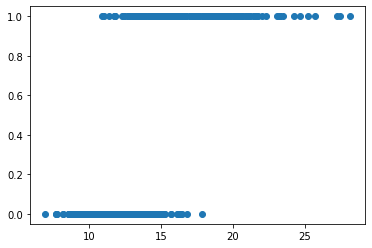

In [279]:
plt.plot(prep_data["radius_mean"],prep_data["diagnosis"],"o")

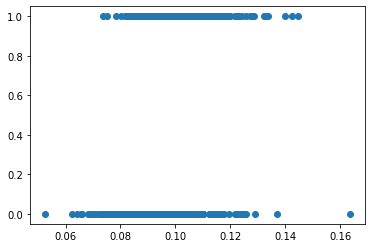

In [280]:
plt.plot(prep_data["smoothness_mean"],prep_data["diagnosis"],"o")

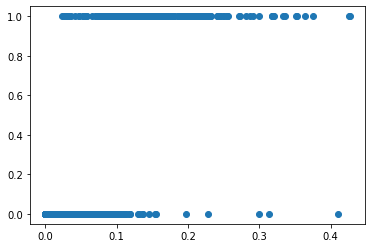

In [281]:
plt.plot(prep_data["concavity_mean"],prep_data["diagnosis"],"o")

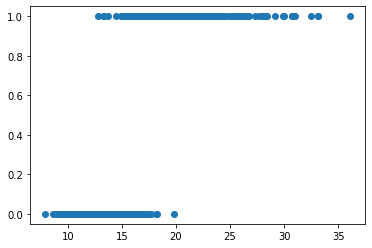

In [282]:
plt.plot(prep_data["radius_worst"],prep_data["diagnosis"],"o")

## input target training test split

In [283]:
prep_data.columns

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_worst'],
      dtype='object')

In [284]:
x=prep_data[["radius_mean","smoothness_mean","concavity_mean","radius_worst"]]
y=prep_data["diagnosis"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=21)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(455, 4) (114, 4) (455,) (114,)


In [322]:
reg=LogisticRegression(solver="liblinear")
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [323]:
reg.coef_

array([[-1.62850199, -0.2641281 ,  2.3590798 ,  1.79033101]])

In [324]:
reg.intercept_

array([-6.48051833])

In [325]:
r=reg.score(x_train,y_train)
r

0.9362637362637363

In [326]:
adj_r=1-(1-r)*(455-1)/(455-4-1)
adj_r

0.9356971916971917

In [327]:
prediction=reg.predict(x_train)
print("prediction done")

prediction done


In [328]:
cm=confusion_matrix(y_train,prediction)
print(cm)

[[276   6]
 [ 23 150]]


In [329]:
print(accuracy_score(y_train,prediction))

0.9362637362637363


In [330]:
trained_df=x_train.copy()
trained_df["target"],trained_df["prediction"]=y_train,prediction
trained_df.reset_index(drop=True,inplace=True)
trained_df["target"].replace({1:"M",0:"B"},inplace=True)
trained_df["prediction"].replace({1:"M",0:"B"},inplace=True)

trained_df

,radius_mean,smoothness_mean,concavity_mean,radius_worst,target,prediction
0,13.27,0.08445,0.035540,15.14,B,B
1,19.73,0.10620,0.241700,25.28,M,M
2,25.22,0.10630,0.333900,30.00,M,M
3,12.36,0.08772,0.060150,13.83,B,B
4,14.97,0.09855,0.026020,16.11,B,B
...,...,...,...,...,...,...
450,11.16,0.10180,0.008955,12.36,B,B
451,11.41,0.09373,0.035120,12.82,B,B
452,21.71,0.09384,0.116800,30.75,M,M
453,12.05,0.10310,0.065920,13.76,B,B


## testing model

In [331]:
test_prediction=reg.predict(x_test)
test_result=pd.DataFrame({"actual result":y_test,"predicted result":test_prediction})
test_result.replace({1:"M",0:"B"},inplace=True)
test_result

,actual result,predicted result
0,B,B
1,B,B
2,M,M
3,M,M
4,M,M
...,...,...
109,M,B
110,M,M
111,B,B
112,B,B


In [332]:
cm=confusion_matrix(test_result["actual result"],test_result["predicted result"])
print(cm)

[[73  2]
 [10 29]]


In [333]:
print("Accuracy:",accuracy_score(test_result["actual result"],test_result["predicted result"]).round(decimals=4)*100.,"%")

Accuracy: 89.47 %
